In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
ols = LinearRegression()
logit = LogisticRegression(C=1e5) 
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
import sklearn.feature_selection as fs
from sklearn import metrics

# Making it so that we can see all columns of the dataframe
pd.set_option('display.max_columns', None)
# Importing the data
# baseline_df have nominal categories dummified.
baseline_df=pd.read_csv('baseline_df.csv',index_col='Id')
undummified_baseline_df=pd.read_csv('undummified_baseline_df.csv',index_col='Id')

standardized_baseline_df=pd.read_csv('standardized_baseline_df.csv',index_col='Id')
normalized_baseline_df=pd.read_csv('normalized_baseline_df.csv',index_col='Id')

standardized_undummified_baseline_df=pd.read_csv('standardized_undummified_baseline_df.csv',index_col='Id')
normalized_undummified_baseline_df=pd.read_csv('normalized_undummified_baseline_df.csv',index_col='Id')

standardized_with_outlier_dummified_baseline_df=pd.read_csv('standardized_with_outlier_dummified_baseline_df.csv',index_col='Id')
normalized_with_outlier_dummified_baseline_df=pd.read_csv('normalized_with_outlier_dummified_baseline_df.csv',index_col='Id')

standardized_with_outlier_undummified_baseline_df=pd.read_csv('standardized_with_outlier_undummified_baseline_df.csv',index_col='Id')
normalized_with_outlier_undummified_baseline_df=pd.read_csv('normalized_with_outlier_undummified_baseline_df.csv',index_col='Id')

all_standardized_baseline_df=pd.read_csv('all_standardized_baseline_df.csv',index_col='Id')
all_normalized_baseline_df=pd.read_csv('all_normalized_baseline_df.csv',index_col='Id')

with_outlier_dummified_baseline_df=pd.read_csv('with_outlier_dummified_baseline_df.csv',index_col='Id')
with_outlier_undummified_baseline_df=pd.read_csv('with_outlier_undummified_baseline_df.csv',index_col='Id')

all_standardized_with_outlier_dummified_baseline_df=pd.read_csv('all_standardized_with_outlier_dummified_baseline_df.csv',index_col='Id')
all_normalized_with_outlier_dummified_baseline_df=pd.read_csv('all_normalized_with_outlier_dummified_baseline_df.csv',index_col='Id')

undummified_grouped_baseline_df=pd.read_csv('undummified_grouped_baseline_df',index_col='Id')
purged_dummified_grouped_baseline_df=pd.read_csv('purged_dummified_grouped_baseline_df',index_col='Id') #

##############################################
# Specify which dataframe to work with:
##############################################
df=purged_dummified_grouped_baseline_df
print(df.isnull().sum().sum())
df.sample(10)

0


,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,MoSold,YrSold,MSZoning__1,MSZoning__2,LotConfig__1,LotConfig__2,Neighborhood__1,Neighborhood__2,Neighborhood__3,Neighborhood__4,Neighborhood__5,Neighborhood__6,Neighborhood__7,Neighborhood__8,Neighborhood__9,Neighborhood__11,Neighborhood__14,Neighborhood__16,Neighborhood__17,Condition2__1,Condition2__3,Condition2__4,BldgType__1,BldgType__2,HouseStyle__1,HouseStyle__2,HouseStyle__3,HouseStyle__4,RoofMatl__1,RoofMatl__2,RoofMatl__4,Exterior1st__1,Exterior1st__2,Exterior1st__3,Exterior1st__4,Exterior1st__5,Exterior1st__6,Exterior1st__7,Exterior2nd__1,Exterior2nd__2,Exterior2nd__3,Exterior2nd__4,Exterior2nd__5,Exterior2nd__6,Exterior2nd__7,MasVnrType__1,MasVnrType__2,Foundation__2,Foundation__3,BsmtFinType1__1,BsmtFinType1__2,BsmtFinType1__3,BsmtFinType1__4,BsmtFinType1__5,BsmtFinType1__6,Heating__1,Heating__2,GarageType__1,GarageType__2,GarageType__3,GarageFinish__1,GarageFinish__2,GarageFinish__3,Fence__1,Fence__2,SaleCondition__1,SaleCondition__2,MSSubClass__1,MSSubClass__2,MSSubClass__3,MSSubClass__4,MSSubClass__5,MSSubClass__6,MSSubClass__7,MSSubClass__8,MSSubClass__9,MSSubClass__10
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1298,11.849405,-1.851321,-1.428765,0.108278,-0.551312,1.190651,1.080534,0.046727,-0.626310,-0.224563,0.716674,0.134859,2.502377,-1.256732,-0.093877,0.023568,-0.800052,-0.812973,1.189027,-0.251353,0.991303,-0.724036,-1.047334,-0.700287,-0.867756,-0.851108,-0.876370,1.166671,0.508623,0.474346,0.286395,0.283633,-0.103183,-1.393061,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1326,10.915107,-1.551499,-1.439047,-1.525986,-1.454066,-1.604628,-1.595434,-0.576817,-0.626310,-0.224563,-0.477783,-1.646164,-0.532952,-0.513009,-2.167696,-0.947370,-0.800052,-1.545867,-0.781870,-0.251353,-0.923535,-0.724036,-1.047334,-0.700287,-0.867756,-0.851108,-0.876370,0.061036,-2.372389,-2.310037,-3.682846,-3.677448,-1.963224,0.120188,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
953,11.804856,-0.352211,-0.499406,-0.708854,2.156951,0.079275,0.937179,-0.576817,-0.626310,2.617560,0.716674,0.134859,1.490601,-0.596640,-0.093877,-1.045871,-0.800052,-1.620219,-0.781870,3.766983,-0.923535,-0.724036,-1.047334,-0.700287,-0.867756,-0.851108,-0.876370,-0.127014,-0.931883,-0.209817,0.286395,0.283633,-0.847199,0.876813,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
281,12.339296,0.967006,0.578124,0.925411,0.351443,0.651802,0.268187,2.008607,1.350227,-0.224563,0.716674,0.134859,1.490601,-0.480154,-0.093877,0.385911,1.294145,1.603451,-0.781870,-0.251353,0.991303,1.289016,0.294977,0.948645,0.616162,0.811426,0.827293,0.498962,0.508623,0.739525,0.286395,0.283633,-1.963224,-0.636436,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
802,11.607335,-1.551499,-1.132161,-1.525986,1.254197,-1.806697,0.315972,-0.576817,-0.626310,-0.224563,-0.477783,0.134859,-0.532952,0.681727,0.943033,0.459787,-0.800052,-0.483702,1.189027,-0.251353,-0.923535,-0.724036,-1.047334,-0.700287,-0.867756,-0.851108,-0.876370,-0.836455,0.508623,0.023541,0.286395,0.283633,0.268826,-0.636436,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1117,12.123240,-0.052389,-0.35

In [2]:
nominal_var_processed=['MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope',\
             'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',\
             'Exterior1st','Exterior2nd','MasVnrType','Foundation',\
             'BsmtFinType1','Heating','CentralAir',\
             'Electrical','Functional','GarageType','GarageFinish',\
             'PavedDrive','Fence','MiscFeature','SaleType','SaleCondition','MSSubClass',\
             'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']
ordinal_var_processed=['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath',\
             'HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',\
             'MoSold','YrSold','HeatingQC','KitchenQual','ExterQual','ExterCond','BsmtQual',\
             'BsmtCond','BsmtExposure','FireplaceQu','GarageQual','GarageCond']
cont_var_processed=['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF',\
          '1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea']
cont_var_for_tuning=ordinal_var_processed+cont_var_processed

In [3]:
x=df.drop('SalePrice',axis=1)
y=df.SalePrice

# Train Test Split (ALL FEATURES)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Train Test Split (ONLY Nominal Categories)
# x_train, x_test, y_train, y_test = train_test_split(x.loc[:,~x.columns.isin(cont_var_for_tuning)], y, test_size=0.3, random_state=0)

# Train Test Split (ONLY CONT. AND ORDINAL)
# x_train, x_test, y_train, y_test = train_test_split(x[cont_var_for_tuning], y, test_size=0.3, random_state=0)

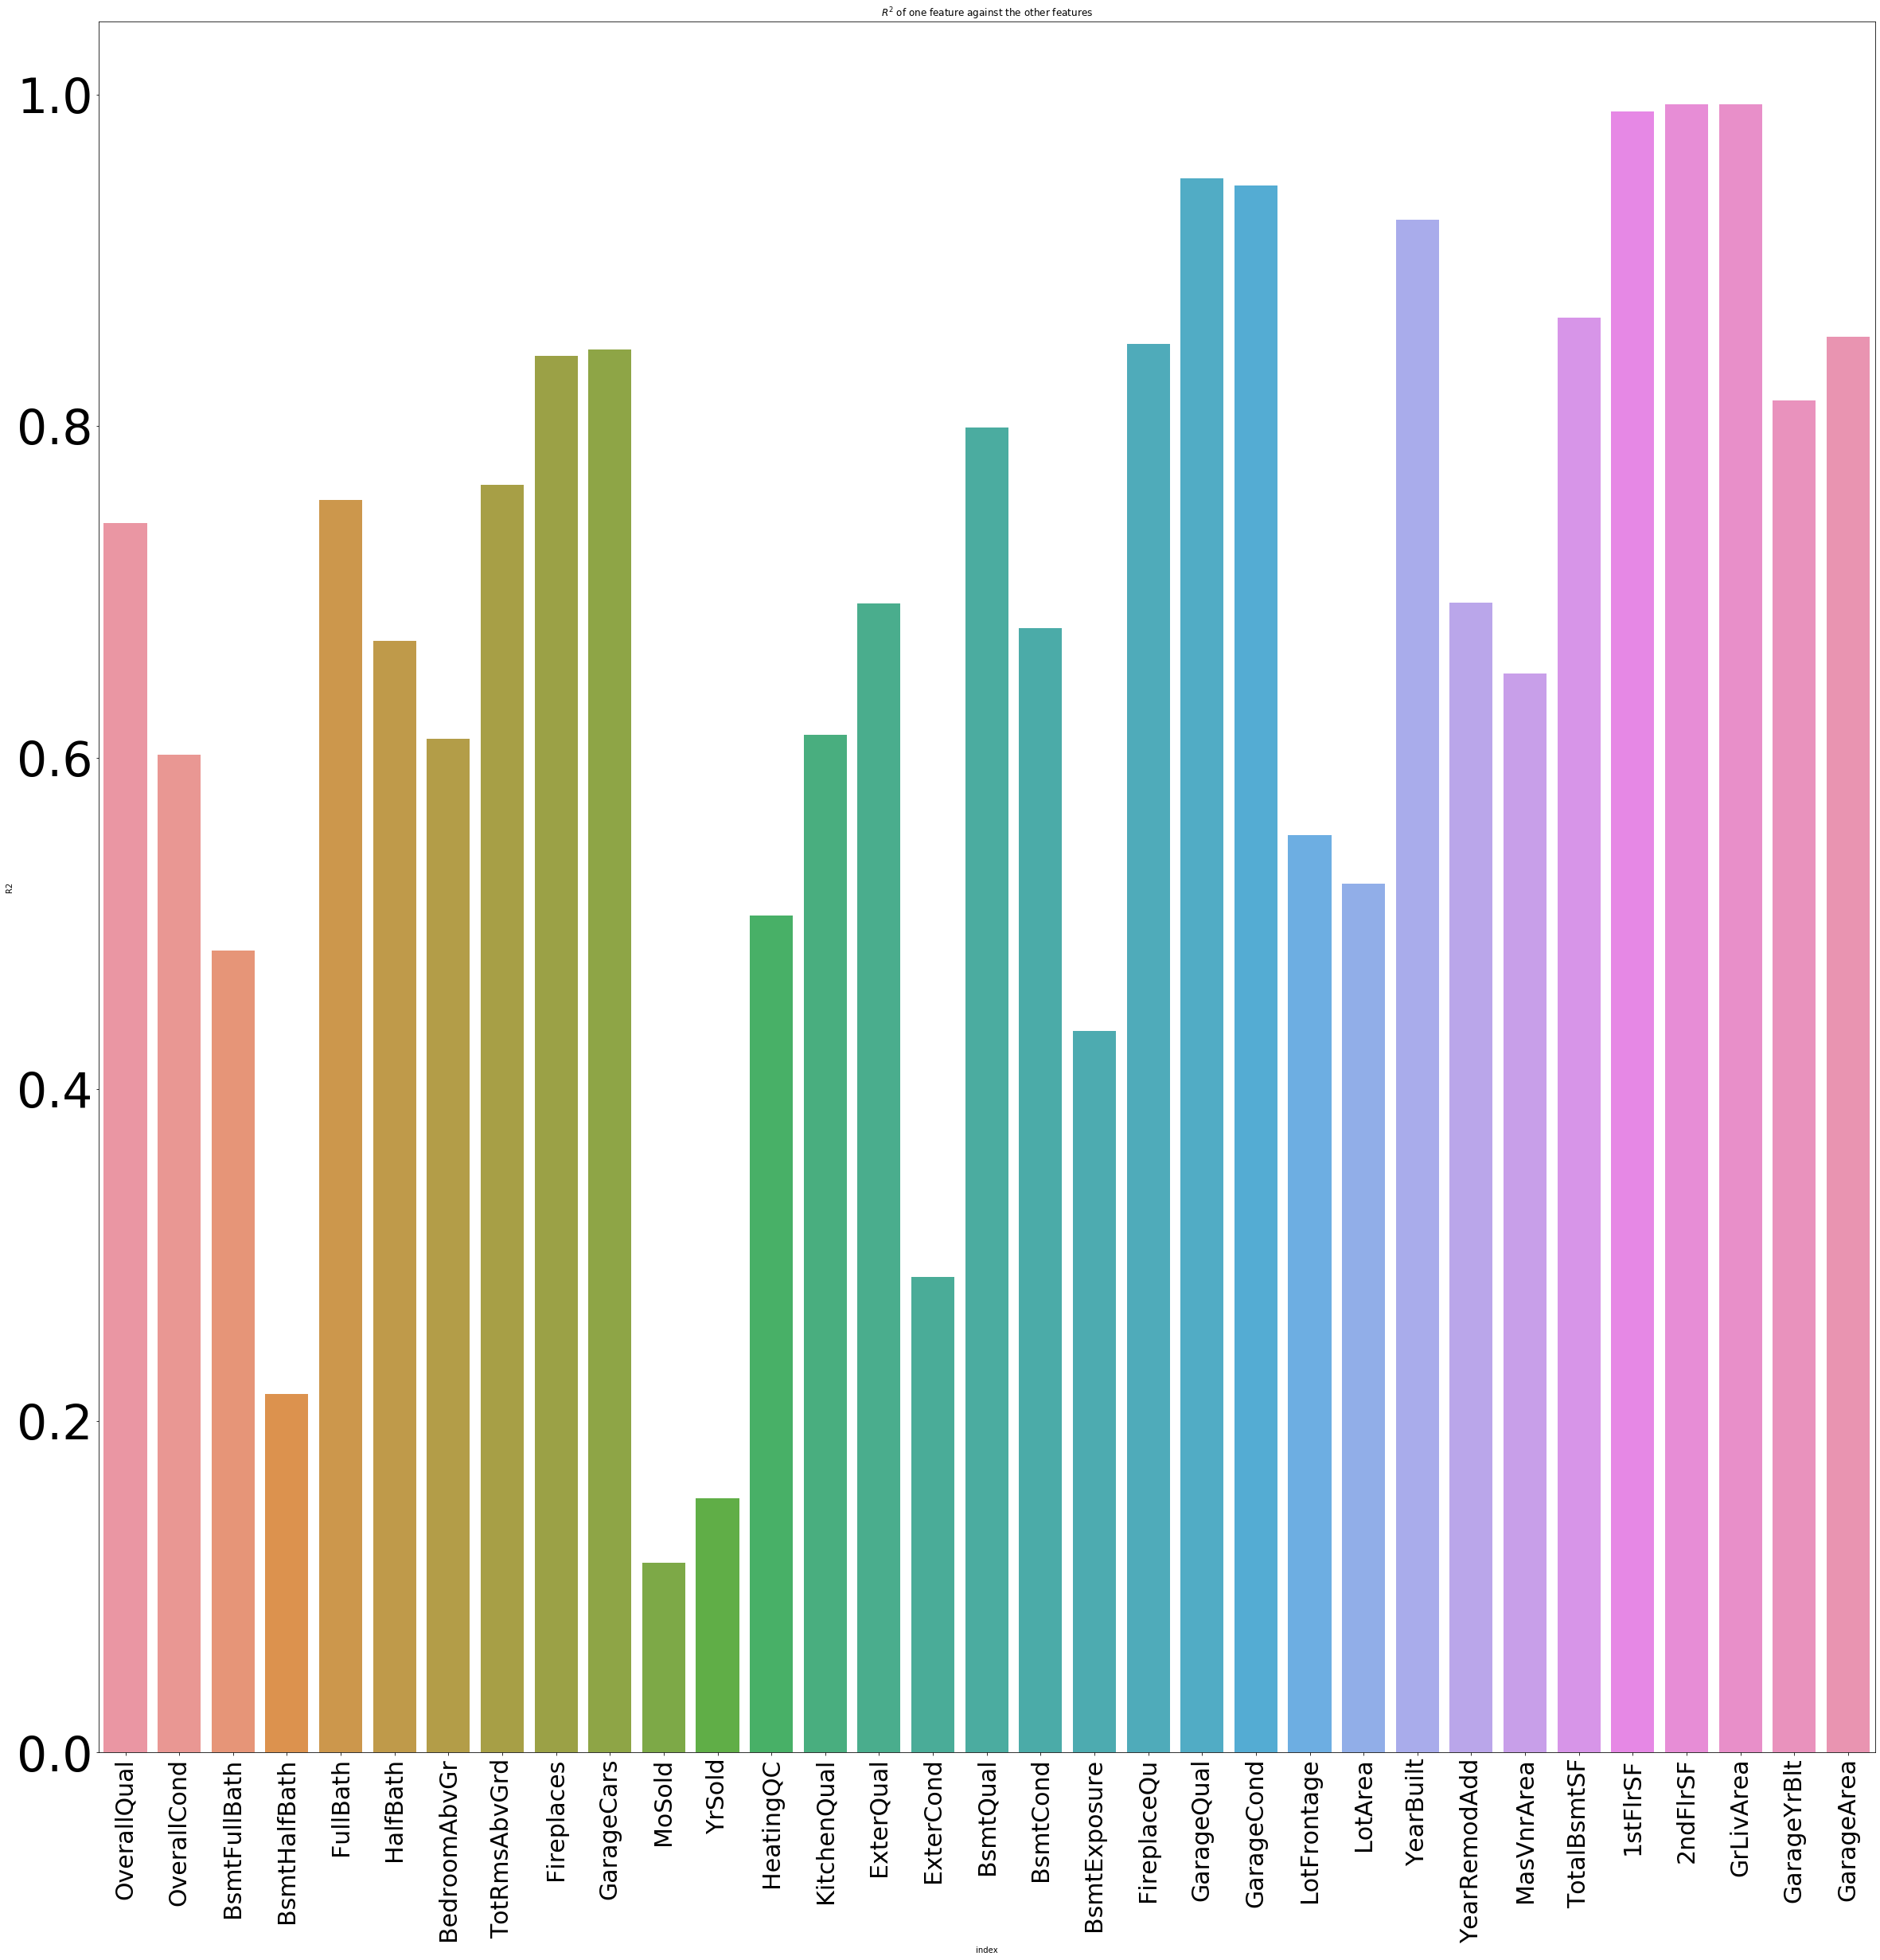

In [4]:
# R^2 score comparisons among continuous features against all other (continuous and categorical)
# High R^2 means collinearity exists between the features
# Continuous features vs continuous,ordinal,nominal variables
scores = {}
ols = LinearRegression()
for feature in cont_var_for_tuning:
                x_copy = x.copy()
                feature_col = x_copy[feature].copy()
                x_copy.drop(feature, axis=1, inplace=True)
                ols.fit(x_copy, feature_col)
                scores[feature] = ols.score(x_copy, feature_col)   
plt.figure(figsize=(40,40))
ax=sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
plt.title('$R^2$ of one feature against the other features');
plt.xticks(rotation=90);
plt.yticks(size=60);
plt.xticks(size=30);
# use R^2=0.4 and 0.8 as a cutoff. Below 0.4 is acceptable. Above 0.8 is unacceptable

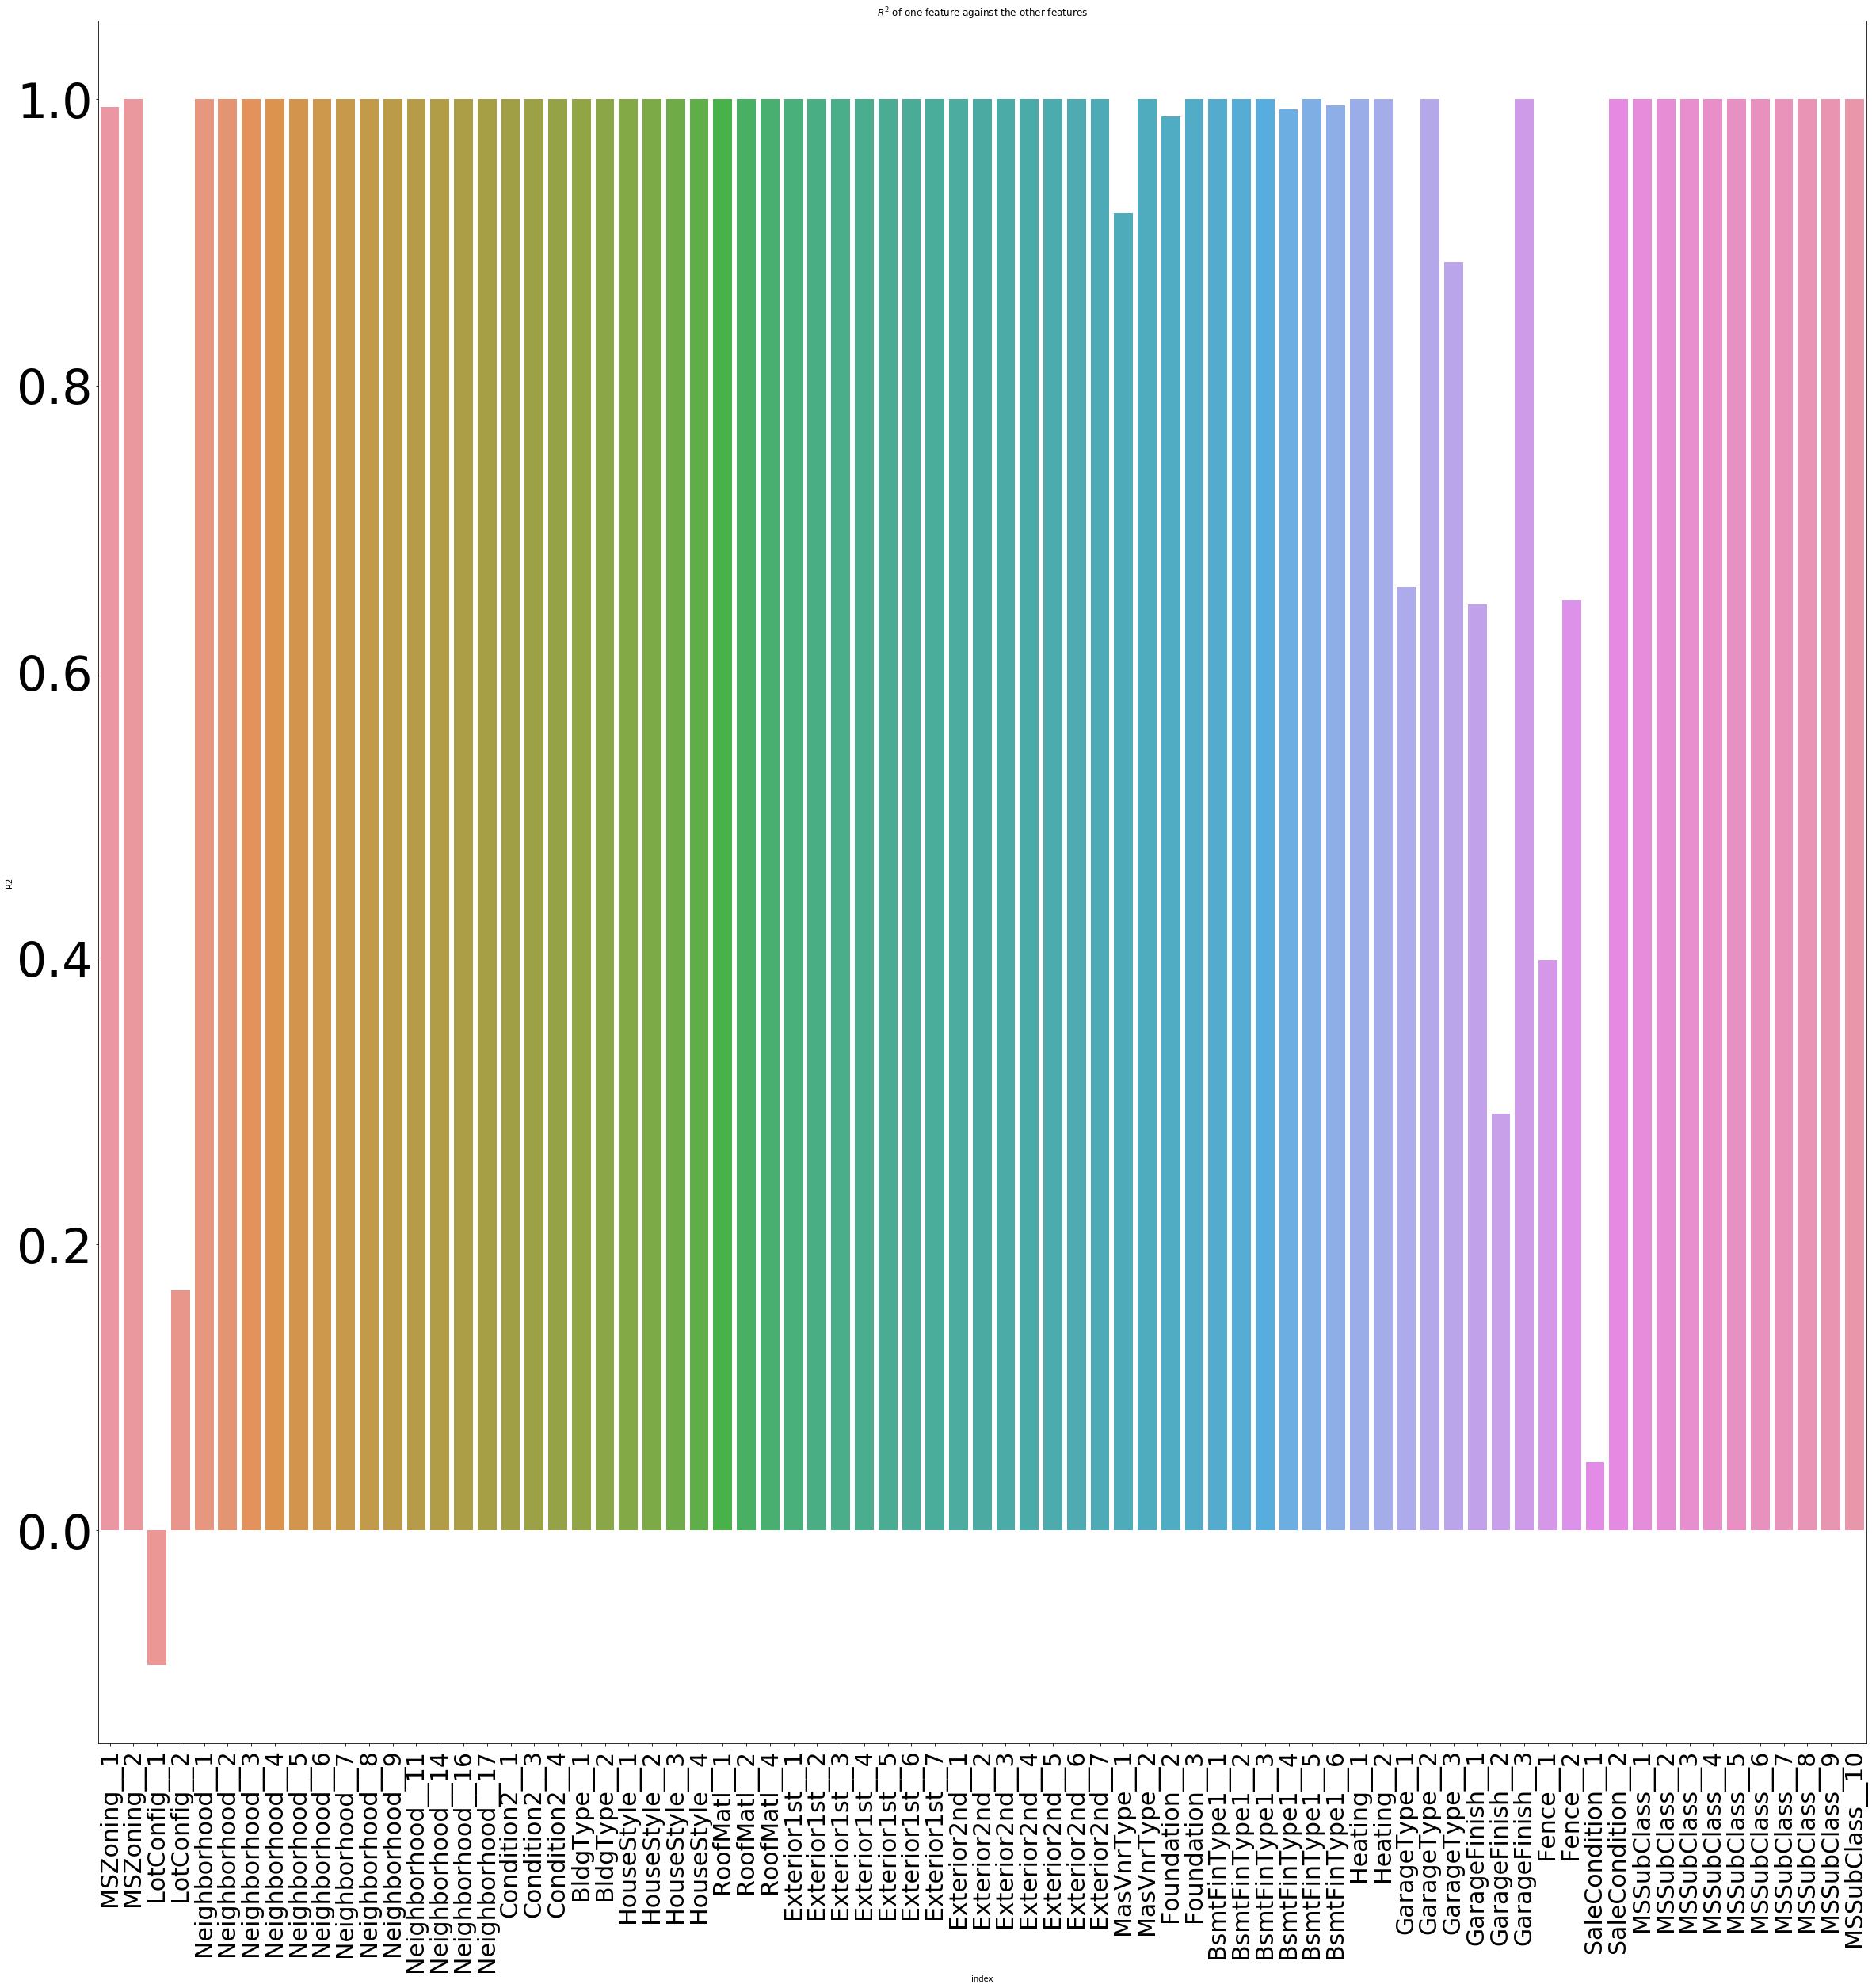

In [5]:
# For dummified classification
cat_scores={}
logit=LogisticRegression(C=1e4,solver='liblinear')
dummified_cat_cols=x.columns[~x.columns.isin(cont_var_for_tuning)]
for feature in dummified_cat_cols:
    x_copy=x.copy()
    feature_col=x_copy[feature].copy()
    x_copy.drop(feature,axis=1,inplace=True)
    logit.fit(x_copy, feature_col)
    cat_scores[feature] = metrics.r2_score(feature_col, logit.predict(x_copy))
plt.figure(figsize=(40,40))
ax=sns.barplot(x='index', y='R2', data=pd.DataFrame(cat_scores, index=['R2']).T.reset_index())
plt.title('$R^2$ of one feature against the other features');
plt.xticks(rotation=90);
plt.yticks(size=60);
plt.xticks(size=30);
# use R^2=0.4 and 0.8 as a cutoff. Below 0.4 is acceptable. Above 0.8 is unacceptable


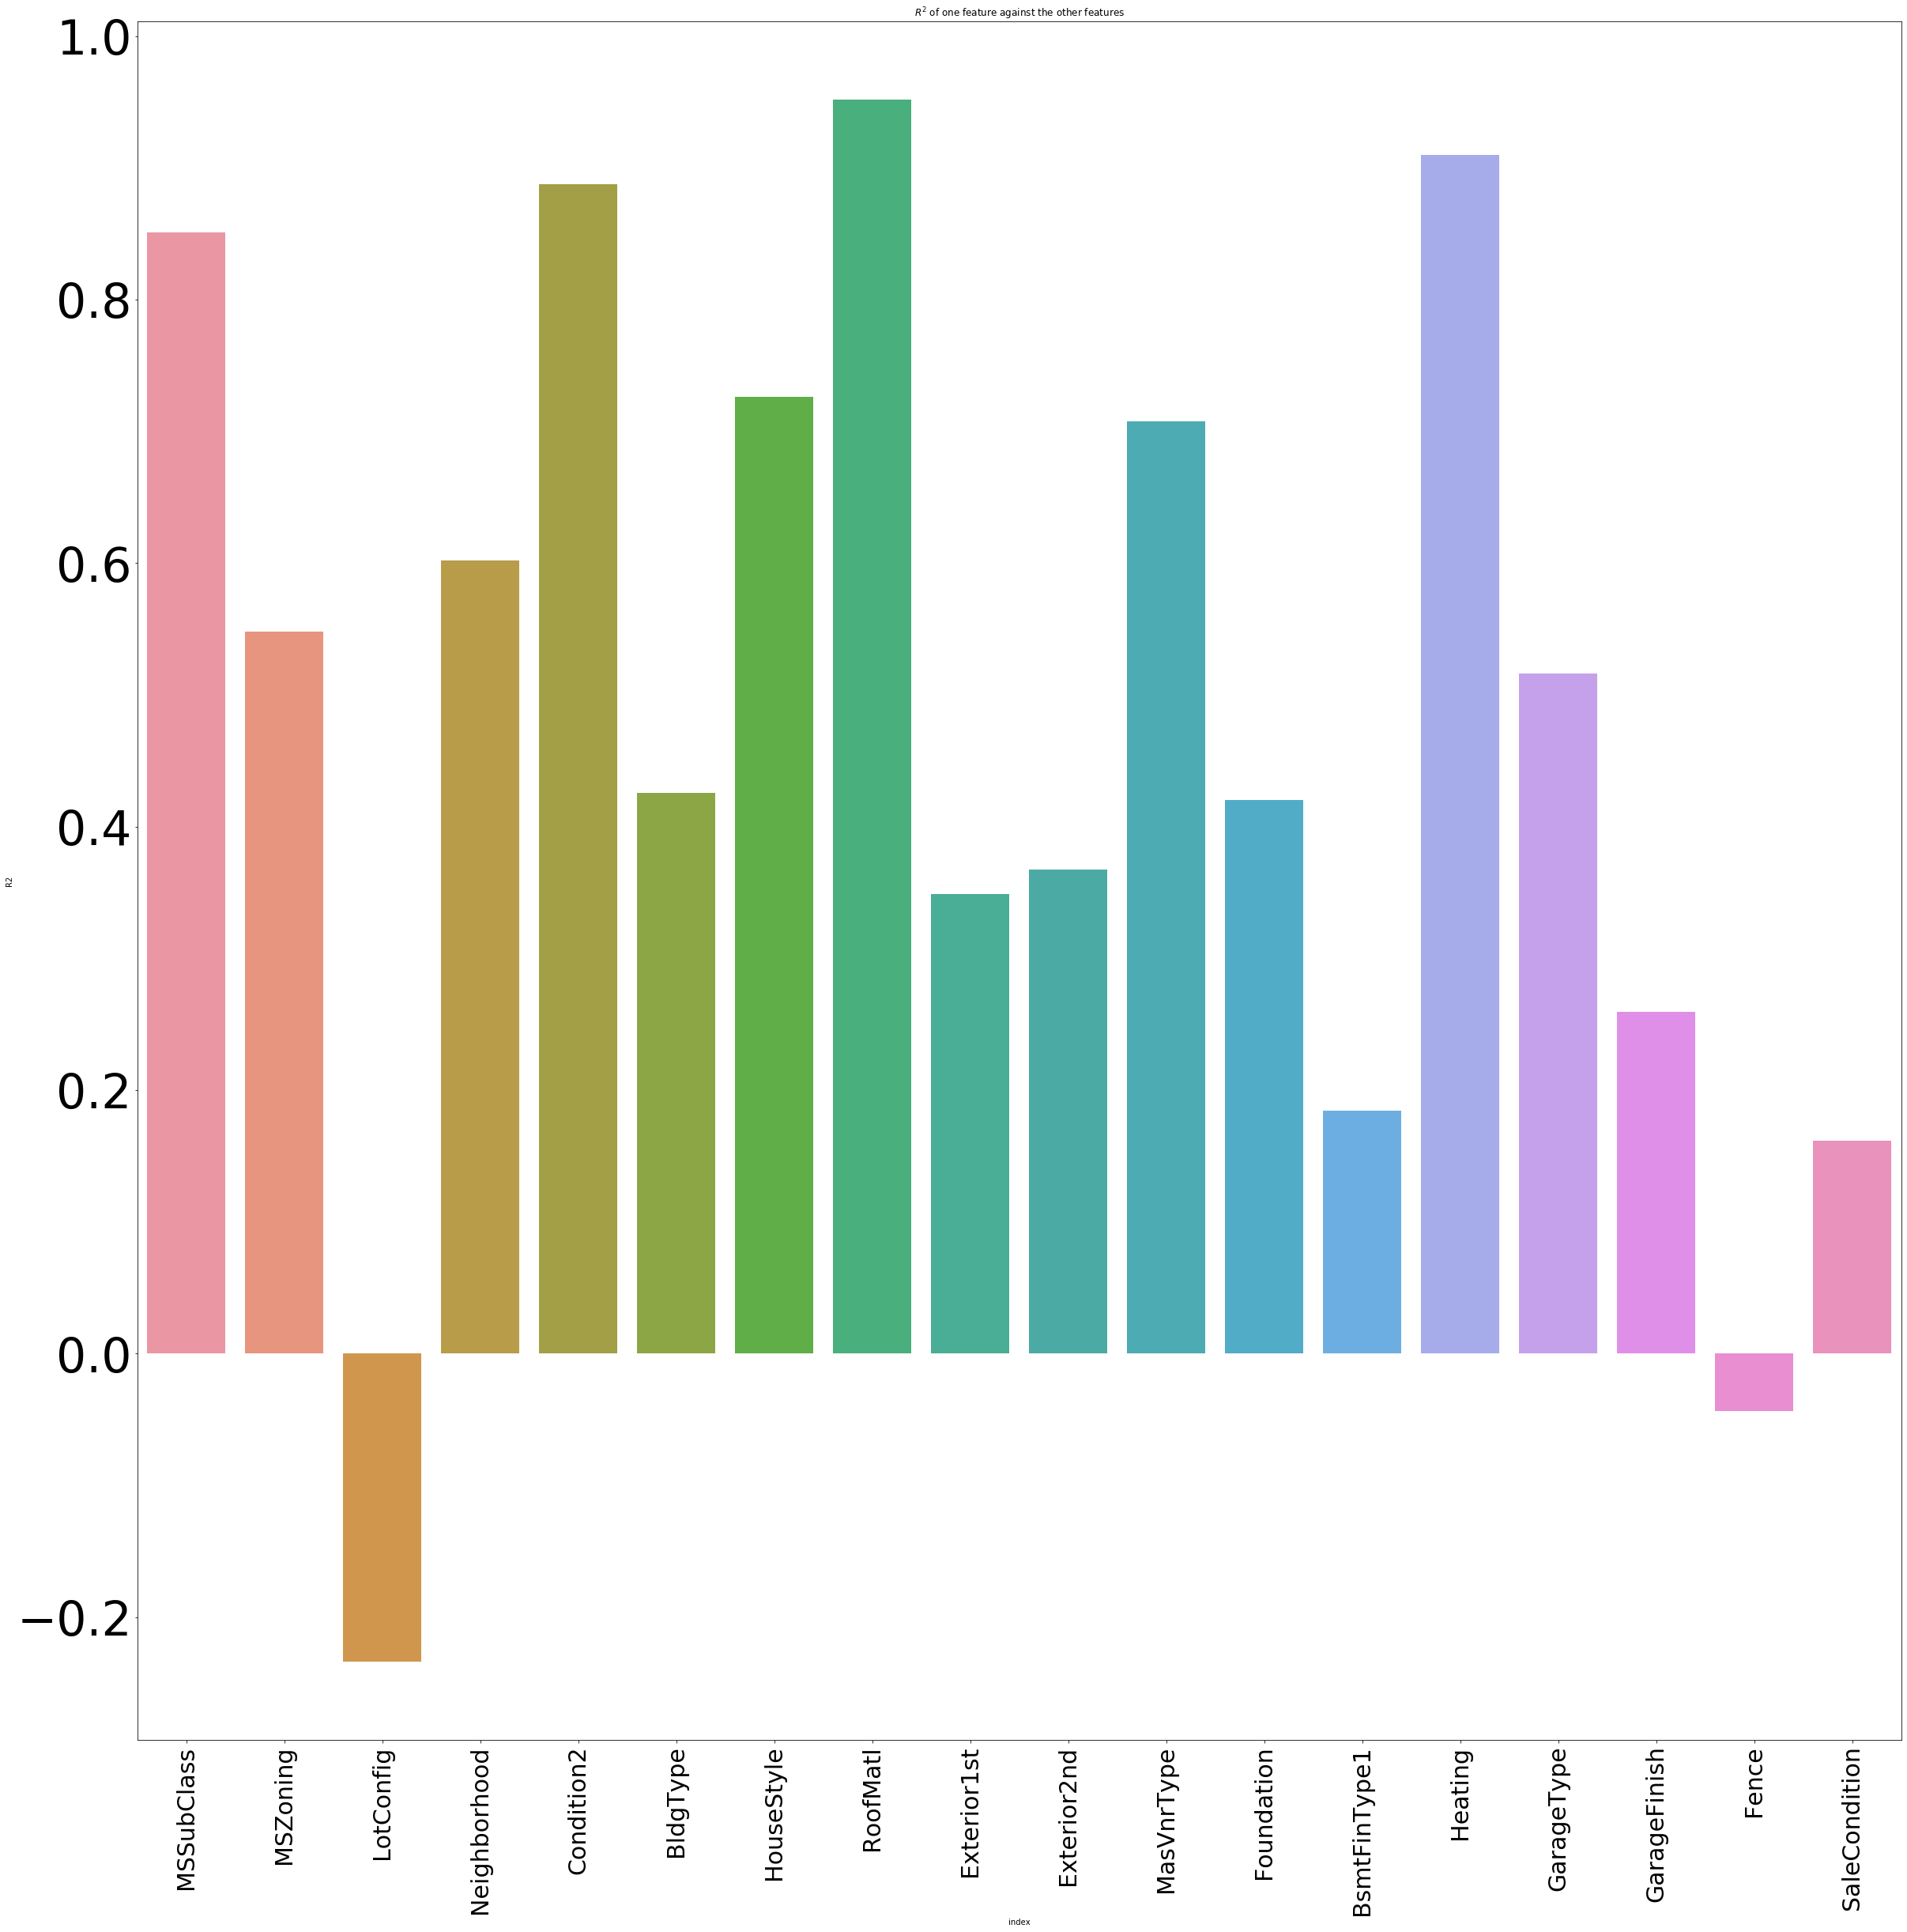

In [7]:
# For umdummified (multiclass) classification
x=undummified_grouped_baseline_df.drop('SalePrice',axis=1)
y=undummified_grouped_baseline_df.SalePrice
# For dummified classification
cat_scores={}
logit=LogisticRegression(C=1e4,solver='liblinear',multi_class='ovr')
dummified_cat_cols=x.columns[~x.columns.isin(cont_var_for_tuning)]
for feature in dummified_cat_cols:
    x_copy=x.copy()
    feature_col=x_copy[feature].copy()
    x_copy.drop(feature,axis=1,inplace=True)
    logit.fit(x_copy, feature_col)
    cat_scores[feature] = metrics.r2_score(feature_col, logit.predict(x_copy))
plt.figure(figsize=(40,40))
ax=sns.barplot(x='index', y='R2', data=pd.DataFrame(cat_scores, index=['R2']).T.reset_index())
plt.title('$R^2$ of one feature against the other features');
plt.xticks(rotation=90);
plt.yticks(size=60);
plt.xticks(size=30);
# use R^2=0.4 and 0.8 as a cutoff. Below 0.4 is acceptable. Above 0.8 is unacceptable